In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
import semopy 

1. Cargue la base de datos y realice los ajustes necesarios para su uso (missing values, recodificar variables, etcetera). Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario.

In [2]:
data = pd.read_csv("junaeb2.csv");
data.dropna(inplace=True);
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39898 entries, 1 to 41853
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sexo        39898 non-null  int64  
 1   edad        39898 non-null  int64  
 2   imce        39898 non-null  float64
 3   vive_padre  39898 non-null  int64  
 4   vive_madre  39898 non-null  int64  
 5   sk1         39898 non-null  int64  
 6   sk2         39898 non-null  int64  
 7   sk3         39898 non-null  int64  
 8   sk4         39898 non-null  int64  
 9   sk5         39898 non-null  int64  
 10  sk6         39898 non-null  int64  
 11  sk7         39898 non-null  int64  
 12  sk8         39898 non-null  int64  
 13  sk9         39898 non-null  int64  
 14  sk10        39898 non-null  int64  
 15  sk11        39898 non-null  int64  
 16  sk12        39898 non-null  int64  
 17  sk13        39898 non-null  int64  
 18  act_fisica  39898 non-null  float64
 19  area        39898 non-null  in

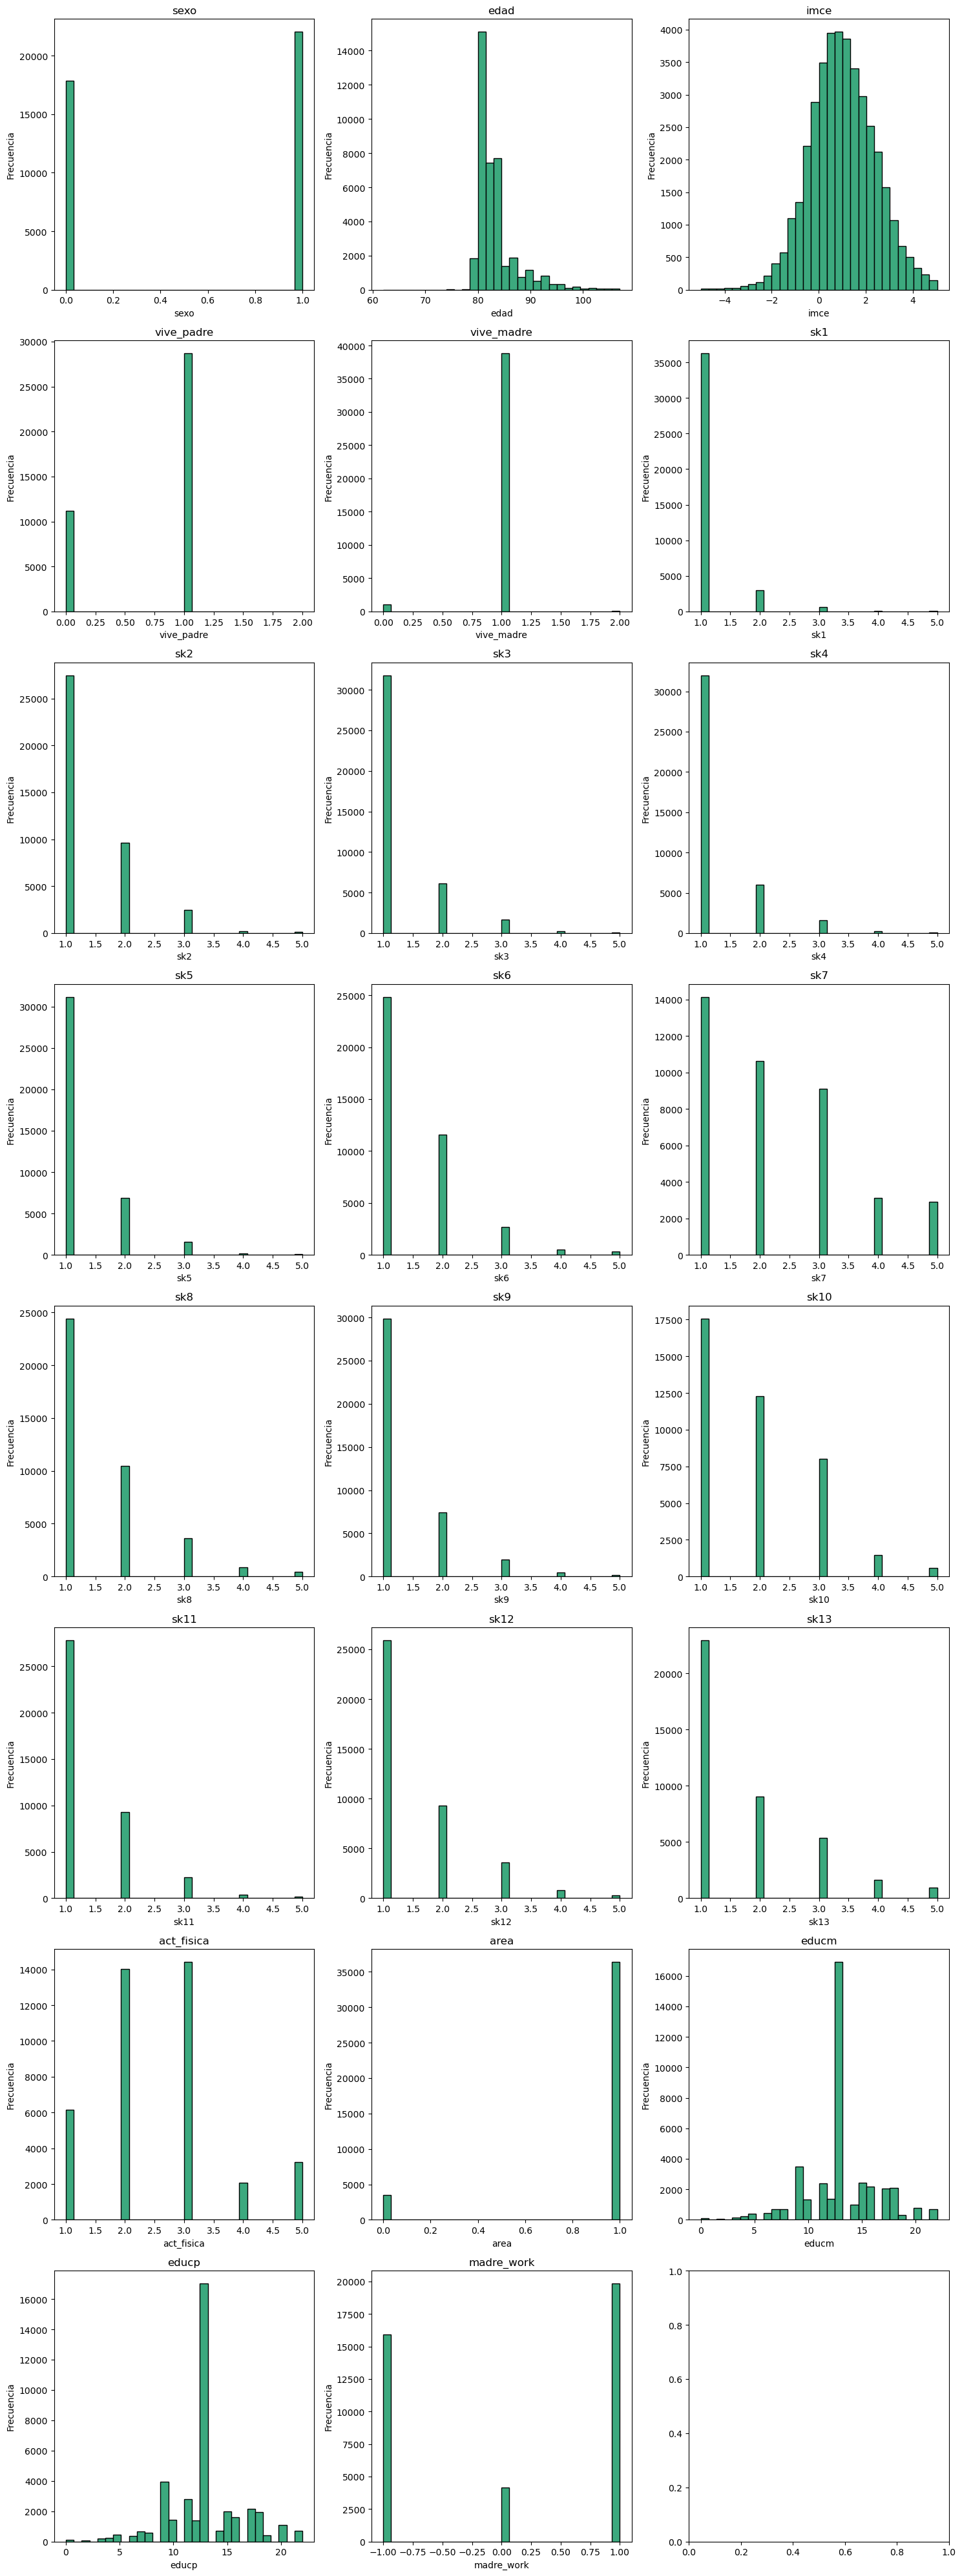

In [3]:
numerical_columns = data.select_dtypes(include='number').columns;
num_columns = len(numerical_columns);
fig, axs = plt.subplots((num_columns + 2) // 3, 3, figsize=(15, (num_columns + 2) // 3 * 5));
for i, column in enumerate(numerical_columns):
    ax = axs[i // 3, i % 3];
    ax.hist(data[column], bins=30, color='#3CA97E', edgecolor='black');
    ax.set_title(f'{column}');
    ax.set_xlabel(column);
    ax.set_ylabel('Frecuencia');
plt.tight_layout();
plt.show()

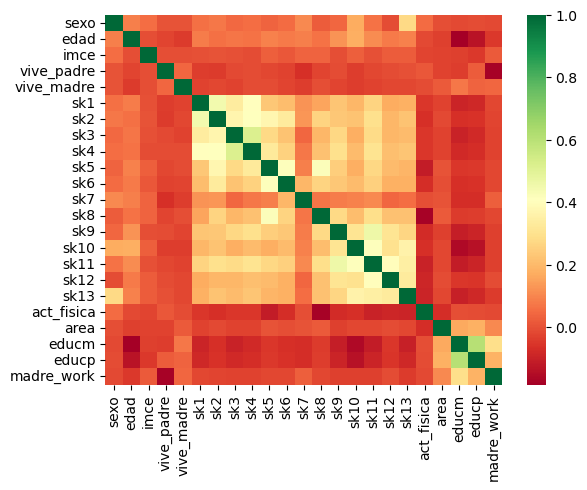

In [4]:
sns.heatmap(data.corr(), cmap='RdYlGn');

2. Usando las variables sk1-sk13 realice un PCA. En particular, identifique los valores propios y determine el numero optimo de componentes. Luego estime y grafique la distribucion de los componentes. Ademas discuta la importancia relativa de las variables sobre cada uno de los componentes estimados. Que se puede concluir de este analisis?

In [5]:
data0 = data.copy()
data_sk = data0[["sk"+str(i) for i in range(1, 14)]];
pca = PCA(n_components=len(data_sk.columns));
pca_features = pca.fit_transform(data_sk);
print(pca.explained_variance_ratio_)

[0.29023744 0.18379003 0.10021546 0.07922673 0.06628868 0.06424966
 0.05160728 0.04410606 0.03240904 0.02941843 0.02473321 0.0209003
 0.01281768]


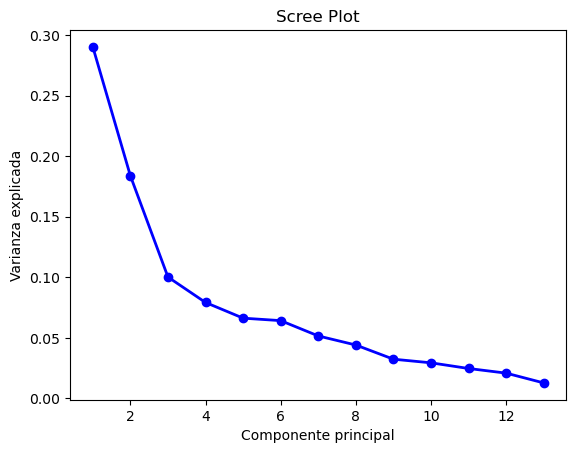

In [6]:
PC_values = np.arange(pca.n_components_) + 1;
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue');
plt.title('Scree Plot');
plt.xlabel('Componente principal');
plt.ylabel('Varianza explicada');
plt.show()

In [7]:
pca_vectors = pd.DataFrame(data = pca.components_)
pca_vectors.head()

0         1         2         3         4         5         6   \
0  0.105446  0.228673  0.171445  0.189575  0.186335  0.250331  0.319635   
1  0.005015  0.023283  0.063225  0.052706  0.035437 -0.041748 -0.933450   
2  0.083818  0.264013  0.189558  0.196065  0.297209  0.332190 -0.116195   
3  0.000739 -0.028808 -0.034733 -0.033641 -0.050616 -0.006470 -0.037272   
4  0.159874  0.297486  0.334437  0.330050 -0.028306  0.148726 -0.035015   

         7         8         9         10        11        12  
0  0.290221  0.248520  0.409348  0.294918  0.294092  0.429746  
1  0.090938  0.080663  0.151374  0.092877  0.148928  0.223235  
2  0.466966  0.084999 -0.376812  0.009416 -0.086945 -0.511659  
3 -0.104653  0.099675  0.711923  0.134608  0.012097 -0.668469  
4 -0.758928  0.084120 -0.161295  0.086777  0.142409 -0.064345

3. Con los resultados de la Pregunta 2, mantenga los primeros 3 componentes principales. Graficamente indique si existen diferencias significativas entre grupos usando las siguientes variables: sexo, area, madre_work y act_fisica. Que puede concluir de los resultados?

In [8]:
pca = PCA(n_components=3);
pca_features = pca.fit_transform(data_sk);

pca_df = pd.DataFrame(data=pca_features,columns=['PC1', 'PC2', 'PC3']);

dfa = pd.merge(data0, pca_df, left_index=True, right_index=True);
dfa.head()

sexo  edad  imce  vive_padre  vive_madre  sk1  sk2  sk3  sk4  sk5  ...  \
1     0    76  0.71           0           1    1    1    1    1    1  ...   
3     1    84  2.05           1           1    1    1    1    1    1  ...   
4     0    86  1.05           1           1    1    1    1    1    1  ...   
5     0    74  1.39           1           1    1    2    1    1    1  ...   
6     1    91  2.75           1           1    1    1    1    2    2  ...   

   sk12  sk13  act_fisica  area  educm  educp  madre_work       PC1       PC2  \
1     1     1         5.0     0    8.0      8           1 -1.620376 -0.278041   
3     1     1         2.0     1   16.0     12          -1 -0.752432 -2.121658   
4     1     1         1.0     1   17.0     15           0  2.245132 -0.052168   
5     1     1         4.0     0    8.0      8          -1  4.230697  1.567886   
6     2     2         2.0     1   20.0     19           1  2.884315  0.252922   

        PC3  
1  0.015046  
3  0.046668  
4  0.027883  
5  0.554240  
6 -0.991052  

[5 rows x 26 columns]

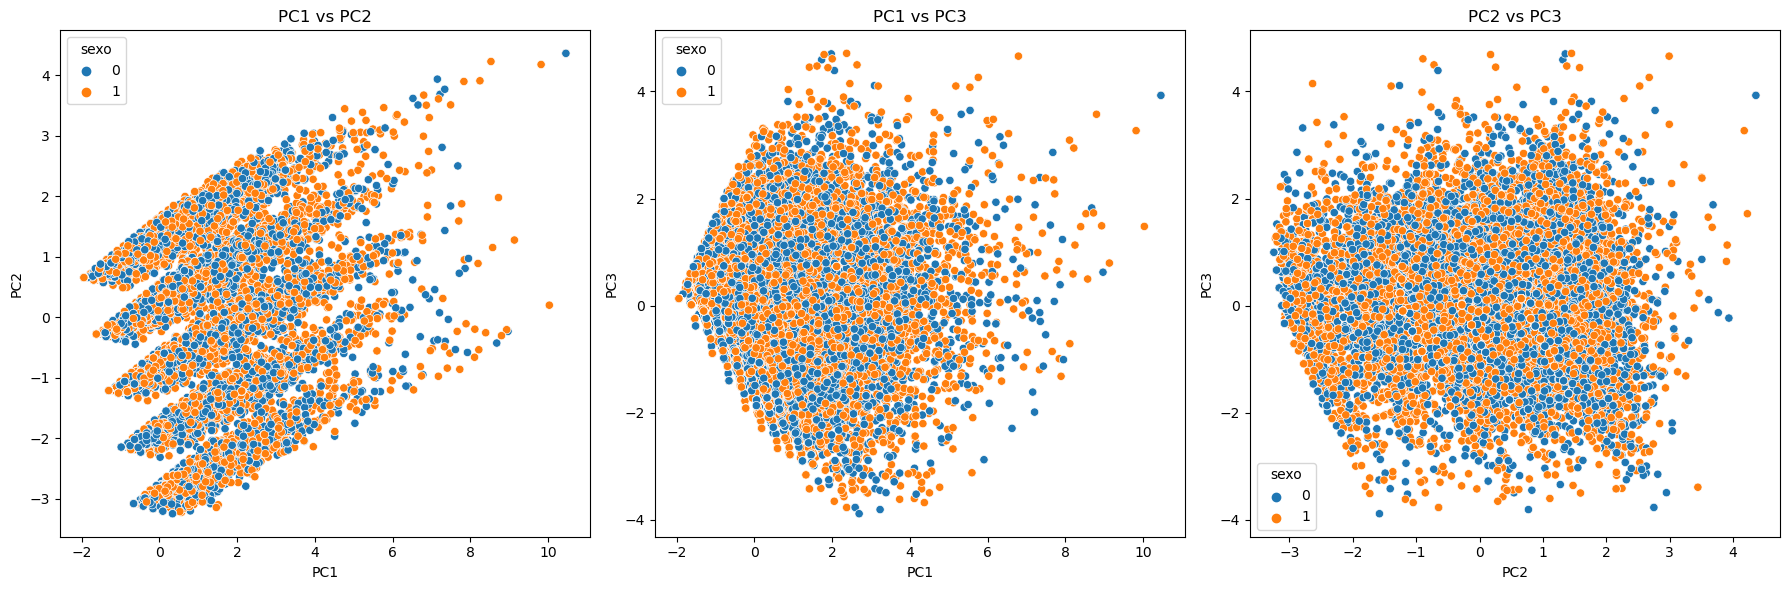

In [9]:
d = "sexo";
fig, axs = plt.subplots(1, 3, figsize=(18, 6));

#Graficar PC1 vs PC2
sns.scatterplot(data=dfa, x='PC1', y='PC2', hue=d, ax=axs[0]);
axs[0].set_title('PC1 vs PC2');
axs[0].set_xlabel('PC1');
axs[0].set_ylabel('PC2');

#Graficar PC1 vs PC3
sns.scatterplot(data=dfa, x='PC1', y='PC3', hue=d, ax=axs[1]);
axs[1].set_title('PC1 vs PC3');
axs[1].set_xlabel('PC1');
axs[1].set_ylabel('PC3');

#Graficar PC2 vs PC3
sns.scatterplot(data=dfa, x='PC2', y='PC3', hue=d, ax=axs[2]);
axs[2].set_title('PC2 vs PC3');
axs[2].set_xlabel('PC2');
axs[2].set_ylabel('PC3');

plt.tight_layout();
plt.show()

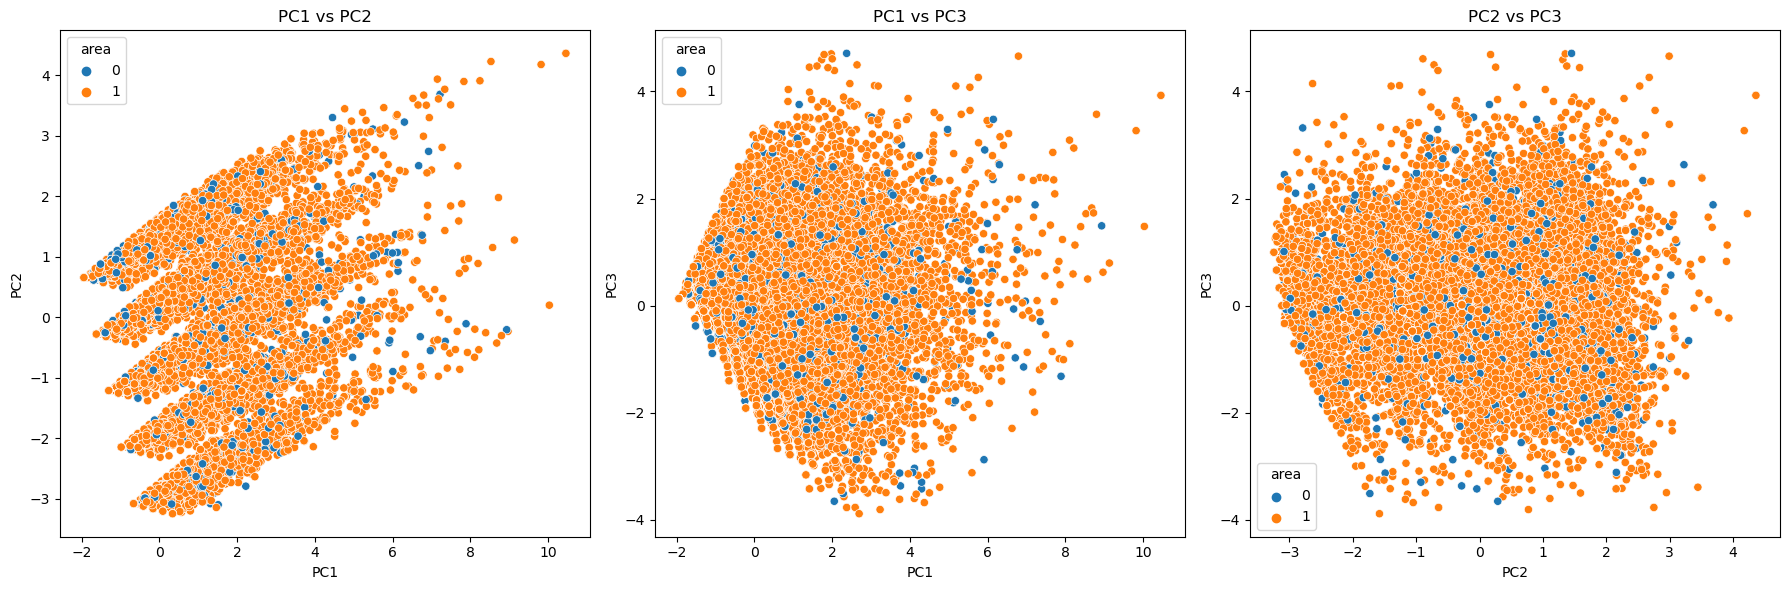

In [31]:
d = "area";
fig, axs = plt.subplots(1, 3, figsize=(18, 6));

#Graficar PC1 vs PC2
sns.scatterplot(data=dfa, x='PC1', y='PC2', hue=d, ax=axs[0]);
axs[0].set_title('PC1 vs PC2');
axs[0].set_xlabel('PC1');
axs[0].set_ylabel('PC2');

#Graficar PC1 vs PC3
sns.scatterplot(data=dfa, x='PC1', y='PC3', hue=d, ax=axs[1]);
axs[1].set_title('PC1 vs PC3');
axs[1].set_xlabel('PC1');
axs[1].set_ylabel('PC3');

#Graficar PC2 vs PC3
sns.scatterplot(data=dfa, x='PC2', y='PC3', hue=d, ax=axs[2]);
axs[2].set_title('PC2 vs PC3');
axs[2].set_xlabel('PC2');
axs[2].set_ylabel('PC3');

plt.tight_layout();
plt.show()

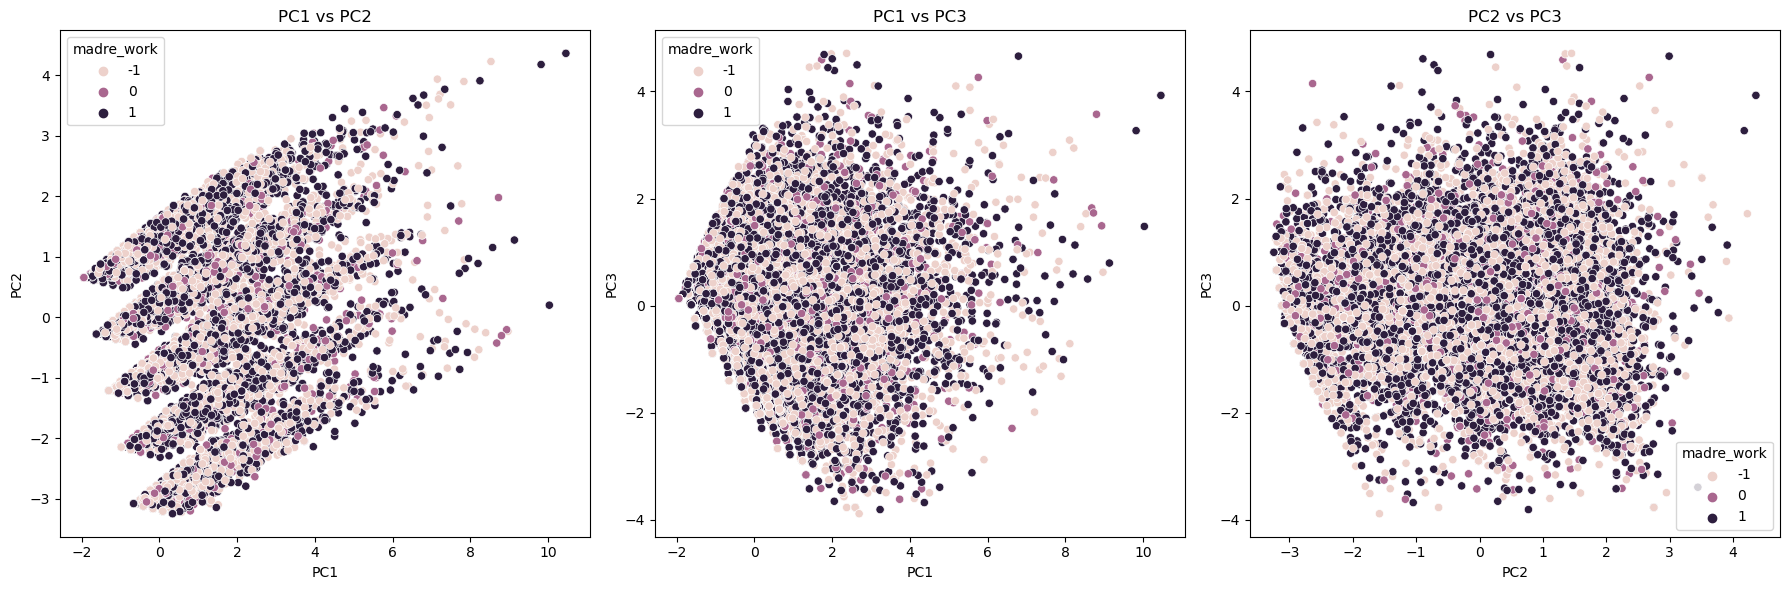

In [35]:
d = "madre_work";
fig, axs = plt.subplots(1, 3, figsize=(18, 6));

#Graficar PC1 vs PC2
sns.scatterplot(data=dfa, x='PC1', y='PC2', hue=d, ax=axs[0]);
axs[0].set_title('PC1 vs PC2');
axs[0].set_xlabel('PC1');
axs[0].set_ylabel('PC2');

#Graficar PC1 vs PC3
sns.scatterplot(data=dfa, x='PC1', y='PC3', hue=d, ax=axs[1]);
axs[1].set_title('PC1 vs PC3');
axs[1].set_xlabel('PC1');
axs[1].set_ylabel('PC3');

#Graficar PC2 vs PC3
sns.scatterplot(data=dfa, x='PC2', y='PC3', hue=d, ax=axs[2]);
axs[2].set_title('PC2 vs PC3');
axs[2].set_xlabel('PC2');
axs[2].set_ylabel('PC3');

plt.tight_layout();
plt.show()

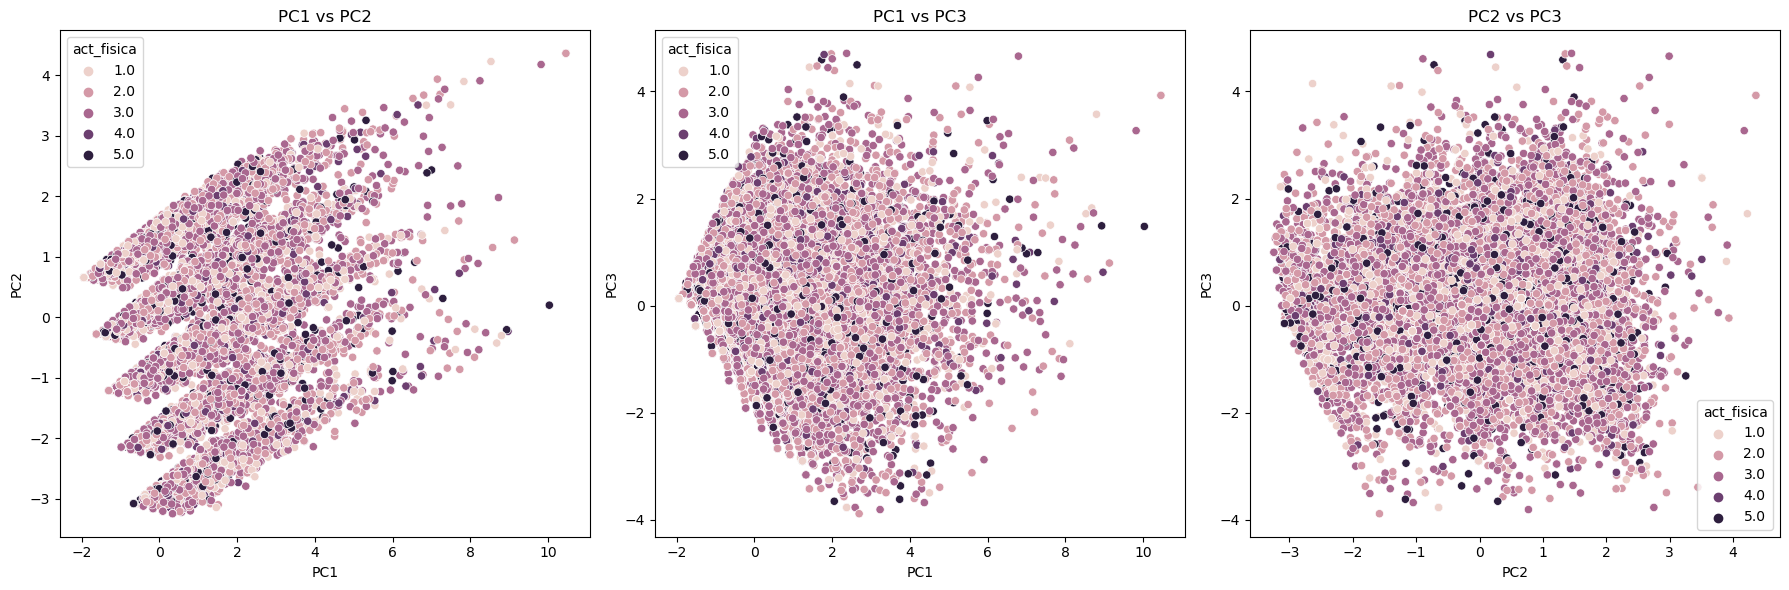

In [36]:
d = "act_fisica";
fig, axs = plt.subplots(1, 3, figsize=(18, 6));

#Graficar PC1 vs PC2
sns.scatterplot(data=dfa, x='PC1', y='PC2', hue=d, ax=axs[0]);
axs[0].set_title('PC1 vs PC2');
axs[0].set_xlabel('PC1');
axs[0].set_ylabel('PC2');

#Graficar PC1 vs PC3
sns.scatterplot(data=dfa, x='PC1', y='PC3', hue=d, ax=axs[1]);
axs[1].set_title('PC1 vs PC3');
axs[1].set_xlabel('PC1');
axs[1].set_ylabel('PC3');

#Graficar PC2 vs PC3
sns.scatterplot(data=dfa, x='PC2', y='PC3', hue=d, ax=axs[2]);
axs[2].set_title('PC2 vs PC3');
axs[2].set_xlabel('PC2');
axs[2].set_ylabel('PC3');

plt.tight_layout();
plt.show()

4. A partir del mismo set de variables sk1-sk13 realice un EFA. En particular determine el numero optimo de factores y las variables que se asocian a cada factor. Tambien discuta si existen variables que no son informativas (Hint: para realizar un EFA, todas las variables deben estar representatadas en el mismo sentido logico. Si una carateristica es negativa debe ser invertida en la escala, de tal forma que todas las variables representen aspectos positivos).

In [10]:
#Debe voltearse sk7
temp_map = {1: -1, 2: -2, 3: -3, 4: -4, 5: -5};
data_sk["sk7"] = data_sk["sk7"].map(temp_map).replace({-1: 5, -2: 4, -3: 3, -4: 2, -5: 1});

C:\Users\HP\AppData\Local\Temp\ipykernel_2820\2633433265.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sk["sk7"] = data_sk["sk7"].map(temp_map).replace({-1: 5, -2: 4, -3: 3, -4: 2, -5: 1});


In [12]:
fa = FactorAnalyzer(rotation='varimax').fit(data_sk);
np.set_printoptions(suppress=True, formatter={'float_kind':'{:f}'.format})
fa.loadings_

array([[0.168627, 0.546201, 0.150317],
       [0.169615, 0.521612, 0.350736],
       [0.186998, 0.589452, 0.158949],
       [0.194442, 0.673242, 0.193061],
       [0.117685, 0.213396, 0.729676],
       [0.173521, 0.206983, 0.484532],
       [-0.072735, -0.079992, -0.144848],
       [0.264605, 0.101318, 0.473972],
       [0.497989, 0.214232, 0.204119],
       [0.553557, 0.120413, 0.129000],
       [0.660687, 0.213328, 0.202922],
       [0.524942, 0.116998, 0.141850],
       [0.496302, 0.147668, 0.133146]])

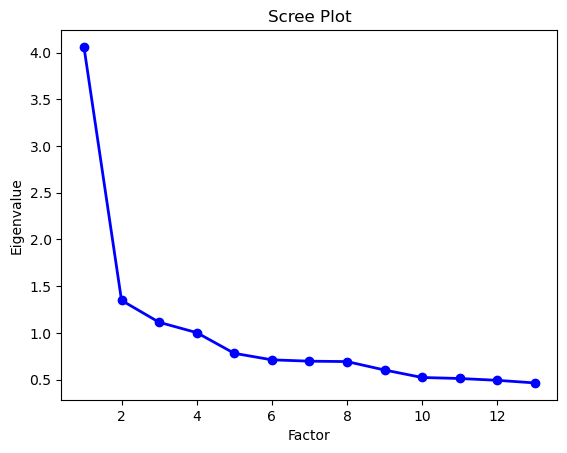

In [13]:
values = np.arange(1,14);
eigenvalues = pd.DataFrame(data=fa.get_eigenvalues());
plt.plot(values, eigenvalues.loc[0], 'o-', linewidth=2, color='blue');
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.show()

In [ ]:
print(semopy.efa.explore_cfa_model(data_sk, pval=0.05));

5. Con los resultados obtenidos en la Pregunta 4, proponga un CFA donde cada variable solo se asocia con un factor. Entregue un nombre a cada factor que representa el concepto comun entre todas las variables. Reporte la importancia de cada medida (variable) a cada factor e indique la correlacion entre factores. 

In [70]:
mod = '''
eta1 =~ sk11 + sk9 + sk10 + sk12            #Interés por aprender
eta2 =~ sk6 + sk7                           #Amabilidad
eta3 =~ sk4 + sk2 + sk5 + sk3 + sk1 + sk8   #Expresa sus sentimientos
'''
#No se incluye sk13 porque quedó solita

model = semopy.Model(mod);
out = model.fit(data_sk);
print(out);

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.275
Number of iterations: 31
Params: 0.803 1.001 0.824 -0.531 1.121 0.842 0.907 0.559 0.967 0.261 0.133 0.324 0.146 0.126 0.135 0.103 0.642 0.195 0.464 0.244 0.221 0.189 0.219 0.222 1.395 0.566 0.281


In [66]:
semopy.calc_stats(model)

DoF  DoF Baseline          chi2  chi2 p-value  chi2 Baseline      CFI  \
Value   59            78  12133.708353           0.0  112005.157609  0.89212   

            GFI      AGFI       NFI       TLI     RMSEA        AIC  \
Value  0.891668  0.856782  0.891668  0.857379  0.071621  63.391764   

              BIC    LogLik  
Value  338.402371  0.304118

In [67]:
model.inspect(mode='list', what="names", std_est=True)

lval  op  rval  Estimate  Est. Std  Std. Err     z-value p-value
0   sk11   ~  eta1  1.000000  0.735776         -           -       -
1    sk9   ~  eta1  0.807971  0.598984  0.008166   98.944667     0.0
2   sk10   ~  eta1  1.074851  0.561617  0.011465   93.747566     0.0
3   sk12   ~  eta1  0.877075  0.544114  0.009616   91.210245     0.0
4    sk6   ~  eta2  1.000000  0.771415         -           -       -
5    sk7   ~  eta2 -0.530749 -0.248233  0.018879  -28.113271     0.0
6    sk4   ~  eta3  1.000000  0.659964         -           -       -
7    sk2   ~  eta3  1.122365  0.655533   0.01081  103.825132     0.0
8    sk5   ~  eta3  0.842024  0.566092  0.009094   92.591145     0.0
9    sk3   ~  eta3  0.907382  0.593506  0.009431    96.20797     0.0
10   sk1   ~  eta3  0.558135  0.552951  0.006146    90.81192     0.0
11   sk8   ~  eta3  0.971516  0.442495  0.012975   74.874275     0.0
12  sk13   ~  eta4  1.000000  0.524622         -           -       -
13  eta1  ~~  eta1  0.246570  1.000000  0.003356   73.477893     0.0
14  eta1  ~~  eta2  0.130598  0.461164  0.002318   56.330879     0.0
15  eta2  ~~  eta2  0.325251  1.000000  0.011474   28.345866     0.0
16  eta3  ~~  eta3  0.145751  1.000000  0.002196   66.382551     0.0
17  eta3  ~~  eta1  0.122975  0.648698  0.001679   73.258497     0.0
18  eta3  ~~  eta2  0.134734  0.618815  0.001922   70.092504     0.0
19  eta3  ~~  eta4  0.132612  0.664802  0.002407   55.083686     0.0
20  eta4  ~~  eta4  0.273006  1.000000  0.003511   77.747133     0.0
21  eta4  ~~  eta1  0.254596  0.981286  0.003364   75.675223     0.0
22  eta4  ~~  eta2  0.130322  0.437344  0.003717   35.058572     0.0
23   sk1  ~~   sk1  0.103093  0.694246  0.000822   125.34353     0.0
24  sk10  ~~  sk10  0.618278  0.684586  0.005065  122.057831     0.0
25  sk11  ~~  sk11  0.208889  0.458634  0.002288   91.282318     0.0
26  sk12  ~~  sk12  0.450993  0.703940  0.003644  123.772871     0.0
27  sk13  ~~  sk13  0.718919  0.724771  0.003511  204.734724     0.0
28   sk2  ~~   sk2  0.243654  0.570276   0.00214  113.862152     0.0
29   sk3  ~~   sk3  0.220673  0.647751  0.001815  121.561226     0.0
30   sk4  ~~   sk4  0.188883  0.564447  0.001669  113.198317     0.0
31   sk5  ~~   sk5  0.219130  0.679540  0.001764  124.204856     0.0
32   sk6  ~~   sk6  0.221316  0.404919  0.011027   20.070127     0.0
33   sk7  ~~   sk7  1.395269  0.938380  0.010346  134.859436     0.0
34   sk8  ~~   sk8  0.565012  0.804198  0.004264  132.497703     0.0
35   sk9  ~~   sk9  0.287678  0.641218  0.002442  117.802497     0.0

6. Finalmente, implemente un SEM completo usando la estructura propuesta en la Pregunta 5. En particular, estime un modelo donde los factores explican el nivel de actividad fisica, junto con otras variables que existen en la base de datos. Ademas utilice otras variables relevantes de la base de datos para explicar los factores latentes. Las variables a incluir en el modelo final deben tener sustento teorico y el modelo final debe optimizar el ajuste a los datos, en base a los criterios vistos en clase. Que puede concluir en base a sus resultados?

In [71]:
mod_cf = '''
eta1 =~ sk11 + sk9 + sk10 + sk12            #Interés por aprender
eta2 =~ sk6 + sk7                           #Amabilidad
eta3 =~ sk4 + sk2 + sk5 + sk3 + sk1 + sk8   #Expresa sus sentimientos

act_fisica =~ eta1 + eta2 + eta3 + sexo + edad + imce + area + madre_work + sk13
eta1 ~ educm + educp
'''

model_cfa = semopy.Model(mod_cf);
out = model_cfa.fit(data);
print(out)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.670
Number of iterations: 51
Params: 0.815 1.087 0.857 0.589 1.098 0.801 0.909 0.557 0.936 0.828 0.711 0.222 1.788 0.074 -0.022 -0.109 1.271 -0.008 -0.005 0.174 0.080 14.957 0.067 0.173 0.062 1.902 0.885 0.239 0.102 0.612 0.209 0.459 0.710 0.246 0.216 0.184 0.226 0.254 1.385 0.571 0.285


In [72]:
semopy.calc_stats(model_cfa)

DoF  DoF Baseline       chi2  chi2 p-value  chi2 Baseline       CFI  \
Value  169           192  26732.642           0.0  145078.778811  0.816659   

            GFI     AGFI       NFI       TLI     RMSEA        AIC         BIC  \
Value  0.815737  0.79066  0.815737  0.791708  0.062767  80.659951  433.017291   

         LogLik  
Value  0.670025

In [73]:
model_cfa.inspect(mode='list', what="names", std_est=True)

lval  op        rval   Estimate  Est. Std  Std. Err     z-value  \
0         eta1   ~  act_fisica   1.000000  0.847949         -           -   
1         eta2   ~  act_fisica   0.827638  0.639041  0.011952   69.244285   
2         eta3   ~  act_fisica   0.710992  0.765050  0.009451   75.228268   
3         eta1   ~       educm  -0.007631 -0.052159  0.000891   -8.562321   
4         eta1   ~       educp  -0.004831 -0.033872  0.000868   -5.562715   
5         sk11   ~        eta1   1.000000  0.732921         -           -   
6          sk9   ~        eta1   0.814709  0.600692  0.008309   98.048946   
7         sk10   ~        eta1   1.086530  0.564388   0.01166   93.186542   
8         sk12   ~        eta1   0.857352  0.528642  0.009731   88.105364   
9          sk6   ~        eta2   1.000000  0.731416         -           -   
10         sk7   ~        eta2   0.589311  0.261321  0.020975   28.096259   
11         sk4   ~        eta3   1.000000  0.670814         -           -   
12         sk2   ~        eta3   1.098346  0.652000  0.010564   103.96673   
13         sk5   ~        eta3   0.800691  0.547120   0.00886   90.372654   
14         sk3   ~        eta3   0.908863  0.604166  0.009269   98.050581   
15         sk1   ~        eta3   0.556707  0.560534  0.006036    92.22868   
16         sk8   ~        eta3   0.936183  0.433385  0.012714   73.635778   
17        sexo   ~  act_fisica   0.222023  0.186422  0.007158   31.016346   
18        edad   ~  act_fisica   1.788317  0.189558  0.056747   31.513714   
19        imce   ~  act_fisica   0.073506  0.022249  0.019409    3.787147   
20        area   ~  act_fisica  -0.021906 -0.032281  0.003988   -5.492614   
21  madre_work   ~  act_fisica  -0.108738 -0.048208  0.013268   -8.195534   
22        sk13   ~  act_fisica   1.270547  0.532635  0.016765   75.786427   
23  act_fisica  ~~  act_fisica   0.174310  1.000000   0.00309    56.41892   
24        eta1  ~~        eta1   0.066664  0.274987  0.002212   30.140723   
25        eta2  ~~        eta2   0.172979  0.591626  0.010165   17.016431   
26        eta3  ~~        eta3   0.062431  0.414699  0.001381   45.198436   
27        area  ~~        area   0.080185  0.998958  0.000568  141.185503   
28        edad  ~~        edad  14.956596  0.964068  0.107406  139.253096   
29        imce  ~~        imce   1.901629  0.999505  0.013466  141.214614   
30  madre_work  ~~  madre_work   0.884785  0.997676   0.00627  141.117142   
31        sexo  ~~        sexo   0.238649  0.965247  0.001713  139.320928   
32         sk1  ~~         sk1   0.101840  0.685801  0.000819   124.27564   
33        sk10  ~~        sk10   0.612284  0.681466  0.005053  121.182648   
34        sk11  ~~        sk11   0.208875  0.462827  0.002302   90.736273   
35        sk12  ~~        sk12   0.459444  0.720538  0.003685  124.681209   
36        sk13  ~~        sk13   0.710457  0.716300   0.00596  119.204936   
37         sk2  ~~         sk2   0.245608  0.574896   0.00216  113.694331   
38         sk3  ~~         sk3   0.216331  0.634983  0.001804   119.89242   
39         sk4  ~~         sk4   0.184007  0.550008  0.001662  110.741112   
40         sk5  ~~         sk5   0.225914  0.700660  0.001801  125.433645   
41         sk6  ~~         sk6   0.254155  0.465031  0.010288   24.703759   
42         sk7  ~~         sk7   1.385368  0.931711   0.01042  132.948842   
43         sk8  ~~         sk8   0.570552  0.812177  0.004299  132.730117   
44         sk9  ~~         sk9   0.285036  0.639169  0.002439  116.864539   

     p-value  
0          -  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
5          -  
6        0.0  
7        0.0  
8        0.0  
9          -  
10       0.0  
11         -  
12       0.0  
13       0.0  
14       0.0  
15       0.0  
16       0.0  
17       0.0  
18       0.0  
19  0.000152  
20       0.0  
21       0.0  
22       0.0  
23       0.0  
24       0.0  
25       0.0  
26       0.0  
27       0.0  
28       0.0  
29       0.0  
30

In [74]:
semopy.semplot(mod_cf, "semmodel.png")

ModuleNotFoundError: No graphviz module is installed.